In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [122]:
solar_data = pd.read_csv('data/solarpower.csv')
display(solar_data)

,date,cum_power
0,2017-01-01,20111.0
1,2017-01-02,20112.0
2,2017-01-03,20115.0
3,2017-01-04,20117.0
4,2017-01-05,20119.0
...,...,...
659,2018-10-22,28101.0
660,2018-10-23,28109.0
661,2018-10-24,28115.0
662,2018-10-25,28117.0


# Задание 3.1

В нашем временном ряде есть несколько пропусков, они обозначены числом -1. Заполните пропуски средним арифметическим между двумя соседними наблюдениями:


Совет: проще всего будет сделать это, используя цикл по индексам элементов столбца cum_power, но вы можете предложить более изящное решение.

Чему равно среднее арифметическое в столбце cum_power после заполнения пропусков? Ответ округлите до целого.

In [123]:
for i in range(1, len(solar_data) - 1):
    if solar_data.loc[i, 'cum_power'] == -1:
        solar_data.loc[i, 'cum_power'] = (solar_data.loc[i - 1, 'cum_power'] + solar_data.loc[i + 1, 'cum_power']) / 2

mean_cum_power = round(solar_data['cum_power'].mean())

mean_cum_power

23848

In [124]:
display(solar_data)

,date,cum_power
0,2017-01-01,20111.0
1,2017-01-02,20112.0
2,2017-01-03,20115.0
3,2017-01-04,20117.0
4,2017-01-05,20119.0
...,...,...
659,2018-10-22,28101.0
660,2018-10-23,28109.0
661,2018-10-24,28115.0
662,2018-10-25,28117.0


# Задание 3.2

Теперь, когда таблица заполнена, создайте столбец day_power — ежедневная выработка солнечной энергии.

Далее создайте данные о средней ежедневной выработке энергии на каждый месяц-год.

Совет: для того чтобы выделить из даты год и месяц, проще всего будет воспользоваться методом аксессора dt.to_period('M'), который позволяет выделять периоды (в данном случае 'М' — месяц).

Затем сгруппируйте данные по периодам (год-месяц) и рассчитайте среднее в столбце day_power.

Сколько солнечной энергии в среднем в день выработали в марте 2017 года? Ответ округлите до целого.

In [125]:
# Создаем столбец day_power, который рассчитывает разницу между текущим и предыдущим значением cum_power.
solar_data['day_power'] = solar_data['cum_power'].diff().fillna(solar_data['cum_power'])

# Убедимся, что столбец 'date' является датой
solar_data['date'] = pd.to_datetime(solar_data['date'])

# Создание нового столбца для год-месяц
solar_data['year_month'] = solar_data['date'].dt.to_period('M')

# Группировка данных по 'year_month' и расчет средней дневной выработки энергии
monthly_mean = solar_data.groupby('year_month')['day_power'].mean()

# Получаем среднюю ежедневную выработку для марта 2017 года
march_2017_mean = round(monthly_mean.loc['2017-03'])

march_2017_mean

11

In [126]:
display(solar_data)

,date,cum_power,day_power,year_month
0,2017-01-01,20111.0,20111.0,2017-01
1,2017-01-02,20112.0,1.0,2017-01
2,2017-01-03,20115.0,3.0,2017-01
3,2017-01-04,20117.0,2.0,2017-01
4,2017-01-05,20119.0,2.0,2017-01
...,...,...,...,...
659,2018-10-22,28101.0,6.0,2018-10
660,2018-10-23,28109.0,8.0,2018-10
661,2018-10-24,28115.0,6.0,2018-10
662,2018-10-25,28117.0,2.0,2018-10


# Задание 3.3

Постройте график временного ряда — средней ежедневной выработки солнечной энергии на каждый месяц-год. Не забудьте подписать оси и сам график.

Выберите вывод, который можно сделать из полученного графика:

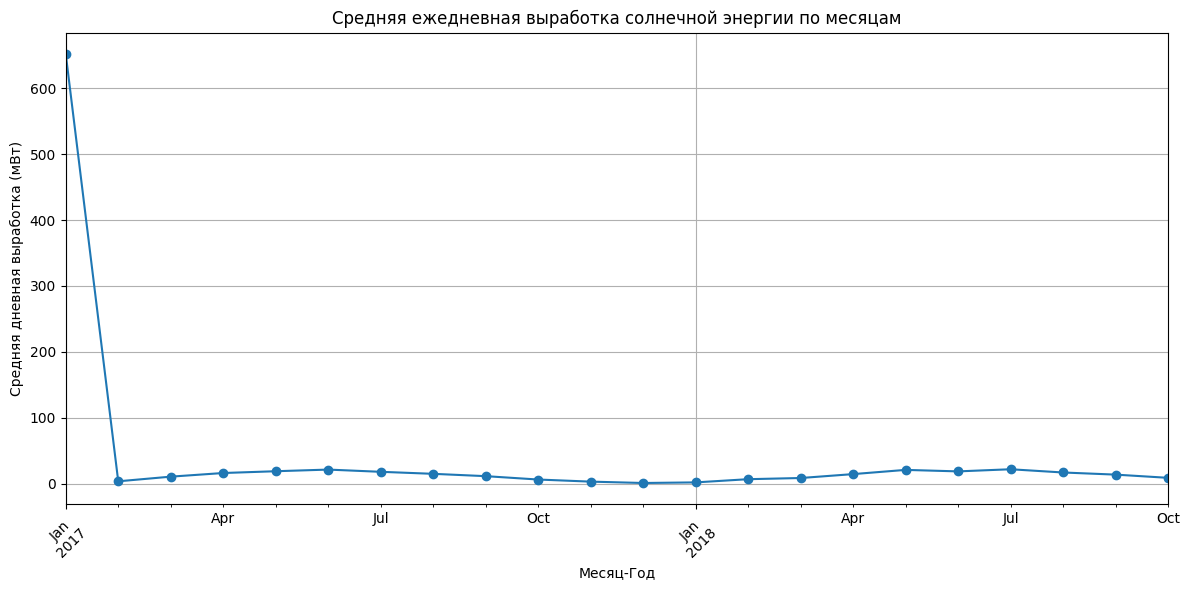

In [127]:
# Группируем данные по month-year и считаем среднюю дневную выработку
monthly_avg = solar_data.groupby('year_month')['day_power'].mean()

# Строим график
plt.figure(figsize=(12, 6))
monthly_avg.plot(marker='o')
plt.title('Средняя ежедневная выработка солнечной энергии по месяцам')
plt.xlabel('Месяц-Год')
plt.ylabel('Средняя дневная выработка (мВт)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()